<a href="https://colab.research.google.com/github/popelucha/NLP-notebooks/blob/main/Film_sentiment_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspired by https://mubaris.com/posts/movie-analysis/

For Czech Sentiment Analysis:

https://nlp.fi.muni.cz/projekty/sentiment_analysis/index.py

# Nová sekce

In [ ]:
#!pip install pysrt

In [ ]:
import requests
from io import StringIO

In [ ]:
# chunk subtitles per 30 dialog pieces (sentences)
chunk_size = 30
chunks = []

"""
Commented out because it was for the srt files.

import pysrt

# Loading the Subtitle
subs = pysrt.open('3265462_Drama_2013_Han Gong-ju.txt')


while True:
  i = 0
  chunk = ''
  for sub in subs:
    if sub.text_without_tags:
      chunk += sub.text_without_tags+' '
      i += 1
      if i==chunk_size:
        chunks.append(chunk.strip())
        i = 0
  break

len(chunks)
"""

"\nCommented out because it was for the srt files.\n\nimport pysrt\n\n# Loading the Subtitle\nsubs = pysrt.open('3265462_Drama_2013_Han Gong-ju.txt')\n\n\nwhile True:\n  i = 0\n  chunk = ''\n  for sub in subs:\n    if sub.text_without_tags:\n      chunk += sub.text_without_tags+' '\n      i += 1\n      if i==chunk_size:\n        chunks.append(chunk.strip())\n        i = 0\n  break\n\nlen(chunks)\n"

In [ ]:
chunk = ''
i = 0
with open('8396188_Action,Comedy,History_2018_Tanks for Stalin.txt') as f:
  for line in f:
    if line.strip().startswith('<s>'):
        line = line.replace('<s>', ' ').replace('</s>', ' ')
        line = line.strip()
        if line:
          chunk += line + ' '
          i += 1
          if i == chunk_size:
            chunks.append(chunk.strip())
            i = 0
            chunk = ''
  if chunk:
    chunks.append(chunk.strip())
len(chunks)

27

In [ ]:
def get_sentiment(sentences):
  file = StringIO(sentences)
  r = requests.post('https://nlp.fi.muni.cz/projekty/languageservices/service.py',
                  files={'call':'sa',
                        'lang':'cs',
                        'output':'json',
                        'text': file})
  return r.json()

In [ ]:
chunks[0]

'Břeh řeky Chalchyn Gol Rok 1939 Tady je 20mm protitanková zbraň. Viděl jsi takovou? Nic jí neodolá. A ještě mají 37mm. Ta je průbojná, zanechá díru jako hlava. Nedaleko jsem jednu zahlédl. Mám to chápat, že tím ospravedlňuješ porážku? Nejsem tady, abych se vymlouval, soudruhu veliteli. Dovedu přiznat svou chybu. Skutečně? Přesně tak. Poslal jsem vojáky do boje v něčem, co by se hodilo jen na přehlídku. A bez rozkazu. Obávám se, že s takovým přístupem tvoje vojenská kariéra brzy skončí. Nevím, jaký osud čeká mě, ale vím, že Rudá armáda má před sebou ještě nejednu bitvu. Zřejmě ano. To je jisté. A vítězství nám zajistí jen tanky. Pancéřované tanky. Takové, které odolají i peklu. Jeď zpátky! Zpátky, slyšíš! Zruš nakládku, Michaile Iljiči. Co jsi čekal? Bez zkoušek v terénu tanky na přehlídku nepojedou. Pokud je nevyzkoušíme, tak je nenaloží. K čertu s tím! Vypni motor! Nedovolí nám je naložit na vagony. Ale zákaz neplatí pro jízdu po vlastní ose!'

In [ ]:
s = get_sentiment(chunks[0])

200
b'{\n    "result": [\n        {\n            "text": "B\xc5\x99eh \xc5\x99eky Chalchyn Gol Rok 1939 Tady je 20mm prot'


In [ ]:
len(s.get('result'))

1

In [ ]:
s.get('result')[0]

{'text': 'Břeh řeky Chalchyn Gol Rok 1939 Tady je 20mm protitanková zbraň. Viděl jsi takovou? Nic jí neodolá. A ještě mají 37mm. Ta je průbojná, zanechá díru jako hlava. Nedaleko jsem jednu zahlédl. Mám to chápat, že tím ospravedlňuješ porážku? Nejsem tady, abych se vymlouval, soudruhu veliteli. Dovedu přiznat svou chybu. Skutečně? Přesně tak. Poslal jsem vojáky do boje v něčem, co by se hodilo jen na přehlídku. A bez rozkazu. Obávám se, že s takovým přístupem tvoje vojenská kariéra brzy skončí. Nevím, jaký osud čeká mě, ale vím, že Rudá armáda má před sebou ještě nejednu bitvu. Zřejmě ano. To je jisté. A vítězství nám zajistí jen tanky. Pancéřované tanky. Takové, které odolají i peklu. Jeď zpátky! Zpátky, slyšíš! Zruš nakládku, Michaile Iljiči. Co jsi čekal? Bez zkoušek v terénu tanky na přehlídku nepojedou. Pokud je nevyzkoušíme, tak je nenaloží. K čertu s tím! Vypni motor! Nedovolí nám je naložit na vagony. Ale zákaz neplatí pro jízdu po vlastní ose!',
 'sentiment_class': 0.14524547

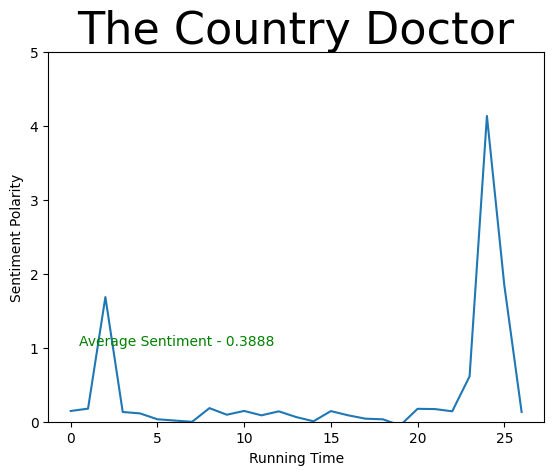

In [ ]:
import matplotlib.pyplot as plt


x = []
y = []
for i in range(len(chunks)):
  x.append(i)
  sent = get_sentiment(chunks[i])
  score = sent.get('result')[0].get('sentiment_class')
  y.append(score)

fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("The Country Doctor", fontsize=32)
plt.ylim((0, 5))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
average = sum(y)/len(y)
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average, 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])